<a href="https://colab.research.google.com/github/mgovindasamy/Machine-Learning-Examples/blob/master/Auto-ml-daily-sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/mgovindasamy/Machine-Learning-Examples/blob/master/Auto-ml-daily-sales.ipynb)

In [1]:
!pip3 install auto-ts
!pip install dask distributed --upgrade
!pip install fbprophet

     |████████████████████████████████| 109 kB 24.5 MB/s 
     |████████████████████████████████| 173.6 MB 7.5 kB/s 
     |████████████████████████████████| 1.1 MB 53.0 MB/s 
     |████████████████████████████████| 1.4 MB 62.8 MB/s 
     |████████████████████████████████| 596 kB 37.5 MB/s 
     |████████████████████████████████| 136 kB 53.5 MB/s 
     |████████████████████████████████| 9.8 MB 44.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Succes

**Import AUTO-ML packages and load Telecom Churn dataset**

In [2]:
from auto_ts import auto_timeseries
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet

Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mgovindasamy/Machine-Learning-Examples/master/day_product_purchase.csv')

train_df=df[(df['CREATION_DATE'] >= '2006-11-04	') & (df['CREATION_DATE'] <= '2019-03-31')]
test_df=df[(df['CREATION_DATE'] > '2019-03-31')]

In [4]:
train_df.head()

,CREATION_DATE,PAYMENT_IN_USD,Transaction_Type
0,2006-11-04 00:00:00,0,product purchase
1,2006-11-05 00:00:00,0,product purchase
2,2006-11-06 00:00:00,7,product purchase
3,2006-11-07 00:00:00,0,product purchase
4,2006-11-08 00:00:00,15,product purchase


In [ ]:
#train_df.set_index("CREATION_DATE", inplace=True)
#test_df.set_index("CREATION_DATE", inplace=True)

In [5]:
train_df['Daily']=pd.to_datetime(train_df['CREATION_DATE'])
test_df['Daily']=pd.to_datetime(test_df['CREATION_DATE'])
train_df=train_df.drop('Transaction_Type',axis=1)
test_df=test_df.drop('Transaction_Type',axis=1)
train_df=train_df.drop('CREATION_DATE',axis=1)
test_df=test_df.drop('CREATION_DATE',axis=1)

In [6]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517 entries, 0 to 4516
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PAYMENT_IN_USD  4517 non-null   int64         
 1   Daily           4517 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 105.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 4517 to 5609
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PAYMENT_IN_USD  1093 non-null   int64         
 1   Daily           1093 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 25.6 KB


In [7]:
model = auto_timeseries(forecast_period=61,
                        score_type='rmse', time_interval='D',
                        model_type='best')

In [8]:
fig = px.line(train_df, x='Daily', y='PAYMENT_IN_USD', title='Product Purchase')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [9]:
train_df.reset_index(inplace=True)

In [31]:
train_df.head()

,index,PAYMENT_IN_USD,Daily
0,0,0,2006-11-04
1,1,0,2006-11-05
2,2,7,2006-11-06
3,3,0,2006-11-07
4,4,15,2006-11-08


Start of Fit.....
    Target variable given as = PAYMENT_IN_USD
Start of loading of data.....
    Inputs: ts_column = Daily, sep = ,, target = ['PAYMENT_IN_USD']
    Using given input: pandas dataframe...
    Daily column exists in given train data...
    train data shape = (4517, 2)
Alert: Could not detect strf_time_format of Daily. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Alert! Data is not stationary even after two differencing. Continuing...
There is no differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding

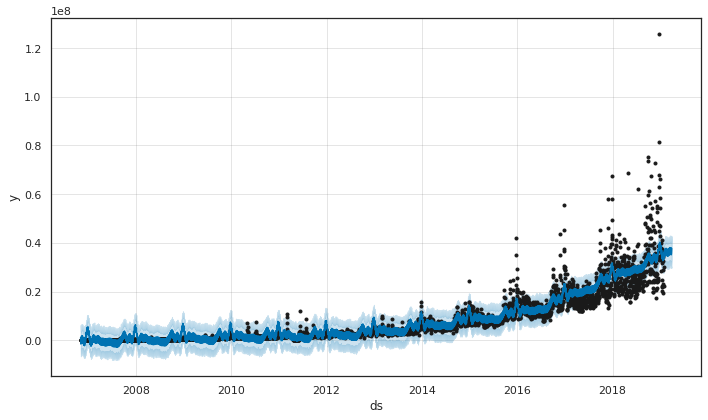

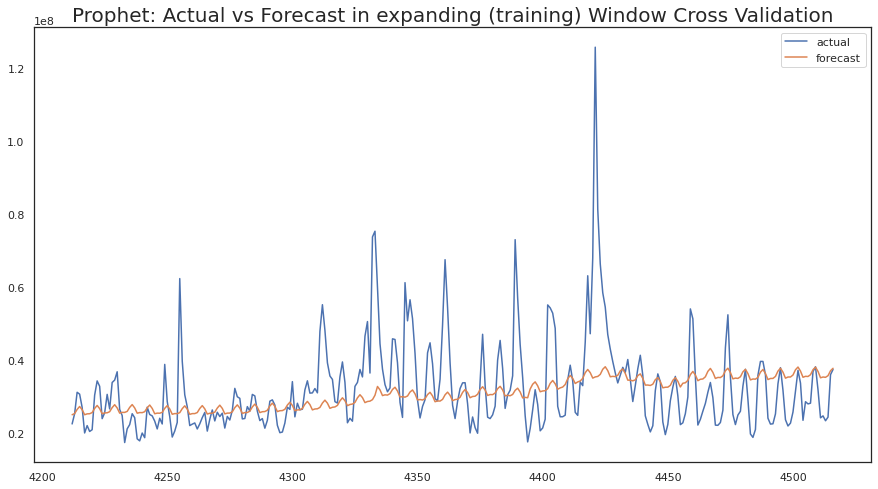

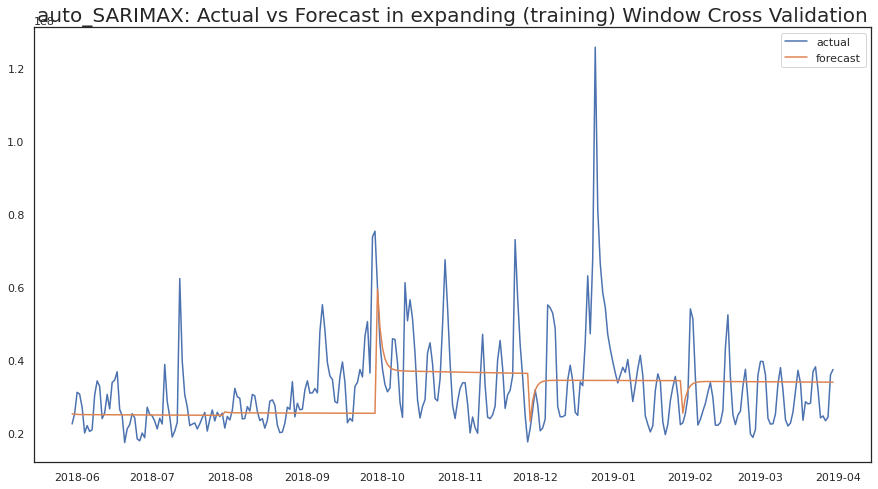

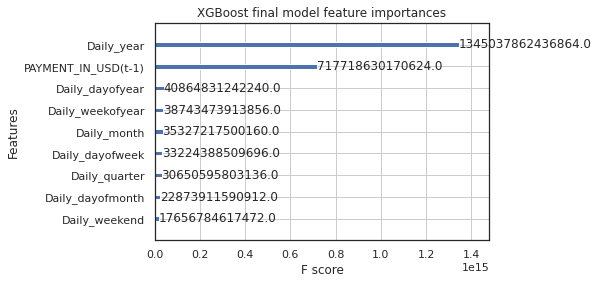

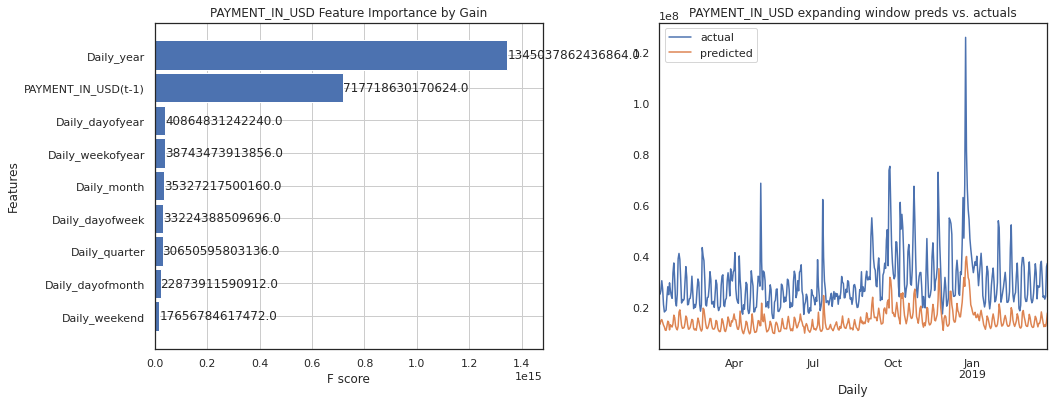

In [33]:
holiday_sale = pd.DataFrame({
  'holiday': 'dec_jan_sale',
  'ds': pd.to_datetime(['	2019-12-25', '2018-12-25', '2017-12-25', '2016-12-25',
                        '2015-12-25', '2014-12-25','2013-12-25','2012-12-25','2011-12-25','2010-12-25','2009-12-25','2008-12-25','2007-12-25',
                        '2006-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})

model.fit(traindata= train_df, 
          ts_column="Daily",
          target="PAYMENT_IN_USD")

Predicting using forecast period=61 as input for Prophet model
(Error): Model is Multivariate, hence test dataframe must be provided for prediction.


In [34]:
model.get_leaderboard()

,name,rmse
0,Prophet,1.140679e+07
1,auto_SARIMAX,1.155881e+07
2,ML,1.722182e+07


In [35]:
model.get_cv_scores()

,Model,CV Scores
0,Prophet,6.617263e+06
1,Prophet,1.103329e+07
2,Prophet,1.313338e+07
3,Prophet,1.693606e+07
4,Prophet,9.313962e+06
5,auto_SARIMAX,6.928697e+06
6,auto_SARIMAX,1.262478e+07
7,auto_SARIMAX,1.184497e+07
8,auto_SARIMAX,1.759145e+07
9,auto_SARIMAX,8.804147e+06


In [36]:
results_dict = model.get_ml_dict()

In [37]:
results_dict['VAR']['forecast']

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>>, {})

In [38]:
test_df.reset_index(inplace=True)

ValueError: ignored

Predicting using test dataframe as input for Prophet model
Building Forecast dataframe. Forecast Period = 1093


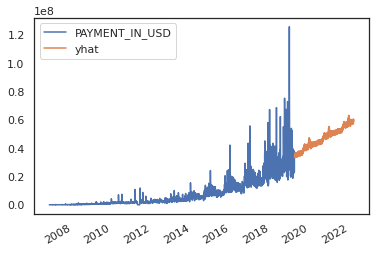

In [40]:
future_predictions = model.predict(testdata=test_df, model='Prophet')  
future_predictions
pd.concat([train_df.set_index('Daily')['PAYMENT_IN_USD'],future_predictions.set_index('ds')['yhat']],axis=1).plot()

In [41]:
future_predictions = model.predict(testdata=test_df, model='ML')  
future_predictions

Predicting using test dataframe shape = (1093, 4) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Daily. Provide strf_time format during "setup" for better results.
ML predictions completed


,PAYMENT_IN_USD,mean_se,mean_ci_lower,mean_ci_upper
Daily,,,,
2019-03-31,26272830.0,NaN,NaN,NaN
2019-04-01,23296366.0,NaN,NaN,NaN
2019-04-02,18287958.0,NaN,NaN,NaN
2019-04-03,16169427.0,NaN,NaN,NaN
2019-04-04,18729208.0,NaN,NaN,NaN
...,...,...,...,...
2022-03-23,28363150.0,NaN,NaN,NaN
2022-03-24,30953860.0,NaN,NaN,NaN
2022-03-25,31251146.0,NaN,NaN,NaN


In [28]:
future_predictions = model.predict(testdata=test_df, model='VAR')  
future_predictions

Predicting using test dataframe as input for Prophet model
(Error) Model of type 'VAR' does not exist. Check inputs and try again.


In [ ]:
test_df.head(3)

In [ ]:
test_df["Sales"].plot(figsize=(15,8), title= 'Sales', fontsize=14)
test_df["Prophet Predictions"].plot(figsize=(15,8), title= 'Sales', fontsize=14)
plt.show()